In [39]:
%reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
from tqdm.notebook import tqdm
import librosa
import sounddevice as sd
from scipy import signal

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
HOUSE_FOLDER = "/home/george/code/clumzy/electronic_tagger/DATA/HOUSE"
TECHNO_FOLDER = "/home/george/code/clumzy/electronic_tagger/DATA/TECHNO"

exts = ['*.mp3', '*.wav', '*.flac', '*.aiff']

house_files = [f for ext in exts for f in glob(os.path.join(HOUSE_FOLDER, ext))]
techno_files = [f for ext in exts for f in glob(os.path.join(TECHNO_FOLDER, ext))]

In [33]:
SONG_NUM = 70
DOWNSAMPLE = 4

house_waveforms = [librosa.load(house_file, sr=44100) for house_file in tqdm(house_files[SONG_NUM:SONG_NUM+1])]
#techno_waveforms = [librosa.load(techno_file, sr=None) for techno_file in tqdm(techno_files[SONG_NUM:SONG_NUM+2])]

SONG_NUM =  0
decimated = signal.resample_poly(house_waveforms[SONG_NUM][0],up=8,down=8*DOWNSAMPLE, padtype="maximum").astype(np.float16)
song = house_waveforms[SONG_NUM][0]

  0%|          | 0/1 [00:00<?, ?it/s]

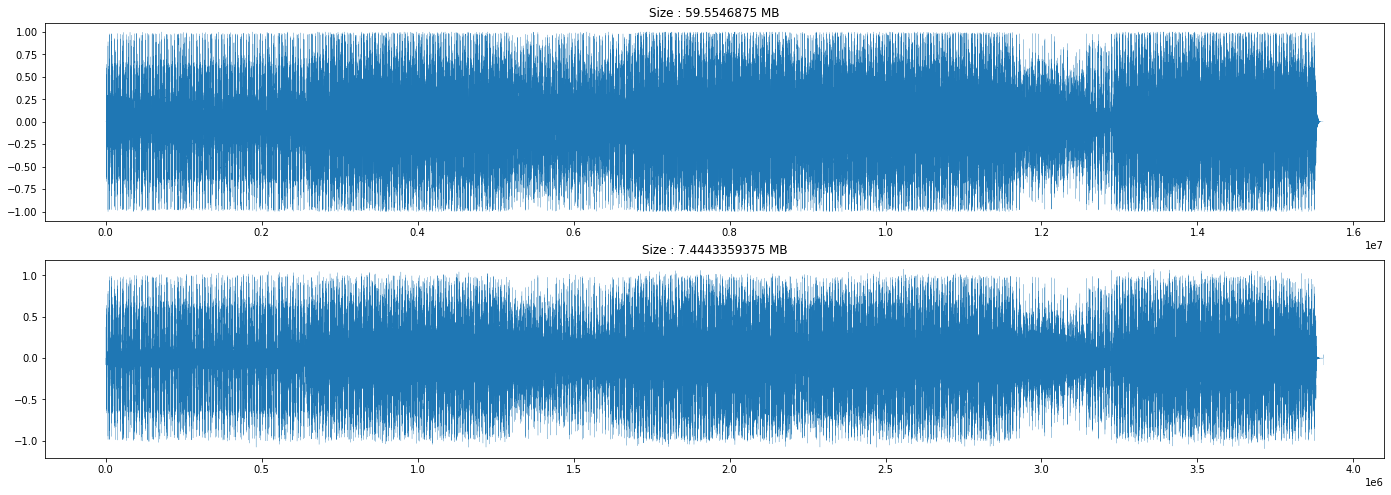

In [34]:
plt.figure(figsize=(24,8))
plt.subplot(2,1,1)
plt.plot(house_waveforms[SONG_NUM][0], linewidth=.2)
plt.title(f"Size : {song.size*song.astype(np.float32).itemsize/1024/1024} MB")
plt.subplot(2,1,2)
plt.plot(decimated, linewidth=0.2)
plt.title(f"Size : {decimated.size*decimated.itemsize/1024/1024} MB")
plt.show()

In [38]:
sd.stop()

In [36]:
from time import sleep

sd.play(decimated.astype(np.float32),house_waveforms[SONG_NUM][1]/DOWNSAMPLE)
for i in tqdm(range(10)):
    sleep(1)
sd.stop()

ALSA lib pcm.c:8545:(snd_pcm_recover) underrun occurred


  0%|          | 0/10 [00:00<?, ?it/s]

In [37]:
sd.play(house_waveforms[SONG_NUM][0],house_waveforms[SONG_NUM][1])
for i in tqdm(range(10)):
    sleep(1)
sd.stop()

ALSA lib pcm.c:8545:(snd_pcm_recover) underrun occurred


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 